In [ ]:
from google.colab import drive


drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/PlantDiseasesDataset.zip'

In [ ]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/PlantDiseasesDataset.zip'
extract_dir = '/content/PlantDiseasesDataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
print("Unzipped successfully to:", extract_dir)


Unzipped successfully to: /content/PlantDiseasesDataset


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

base_path = '/content/PlantDiseasesDataset'
plants = [p for p in os.listdir(base_path) if not p.startswith('.')]

print("Here are the plants you can pick:")
for i, plant in enumerate(plants):
    print(f"{i+1}.{plant}")

Here are the plants you can pick:
1.Cherry
2.Grape
3.Potato
4.Citrus
5.Bell pepper
6.Corn
7.Strawberry
8.Tomato
9.Apple
10.Peach


In [ ]:

choice = input("Type the number of the plant you want: ")

try:
    choice = int(choice) - 1
    if choice < 0 or choice >= len(plants):
        print("That's not a valid number")
        exit()
    selected_plant = plants[choice]
    print(f"You selected: {selected_plant}")
except:
    print("Please type a valid number")
    exit()

Type the number of the plant you want: 3
You selected: Potato


In [ ]:
train_path = os.path.join(base_path, selected_plant, 'train')
valid_path = os.path.join(base_path, selected_plant, 'valid')

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

import tensorflow as tf
import numpy as np
import random

seed=42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED']= str(seed)

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ReduceLROnPlateau(patience=3, factor=0.5),
    ModelCheckpoint('best_model.h5', save_best_only=True)
]


train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(180, 180),
    batch_size=16,
    class_mode='sparse',
    seed=seed
)

valid_generator = valid_datagen.flow_from_directory(
    valid_path,
    target_size=(180, 180),
    batch_size=16,
    class_mode='sparse',
    seed=seed
)

Found 9485 images belonging to 3 classes.
Found 25 images belonging to 3 classes.


**MODEL 1**

In [ ]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(180,180,3)),BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),BatchNormalization(),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:


history = model.fit(
    train_generator,
    epochs=10,
    validation_data=valid_generator,
    callbacks=callbacks
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8433 - loss: 4.2052

593/593 ━━━━━━━━━━━━━━━━━━━━ 946s 2s/step - accuracy: 0.8433 - loss: 4.2006 - val_accuracy: 0.5600 - val_loss: 1.4363 - learning_rate: 0.0010
Epoch 2/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9638 - loss: 0.1382

593/593 ━━━━━━━━━━━━━━━━━━━━ 927s 2s/step - accuracy: 0.9638 - loss: 0.1383 - val_accuracy: 0.7200 - val_loss: 0.8035 - learning_rate: 0.0010
Epoch 3/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 934s 2s/step - accuracy: 0.9573 - loss: 0.1661 - val_accuracy: 0.7600 - val_loss: 0.8783 - learning_rate: 0.0010
Epoch 4/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 933s 2s/step - accuracy: 0.9721 - loss: 0.1047 - val_accuracy: 0.7200 - val_loss: 0.8475 - learning_rate: 0.0010
Epoch 5/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 912s 2s/step - accuracy: 0.9852 - loss: 0.0424 - val_accuracy: 0.5600 - val_loss: 10.7872 - learning_rate: 0.0010
Epoch 6/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 920s 2s/step - accuracy: 0.9764 - loss: 0.1120 - val_accuracy: 0.8400 - val_loss: 1.0516 - learning_rate: 5.0000e-04
Epoch 7/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 917s 2s/step - accuracy: 0.9897 - loss: 0.0322 - val_accuracy: 0.6400 - val_loss: 1.4397 - learning_rate: 5.0000e-04


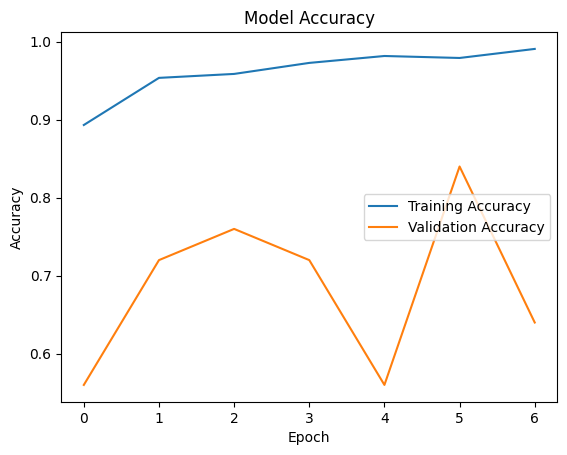

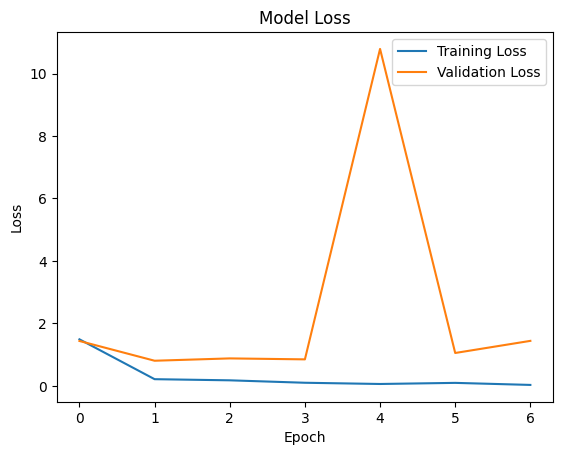

In [ ]:


import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 478ms/step


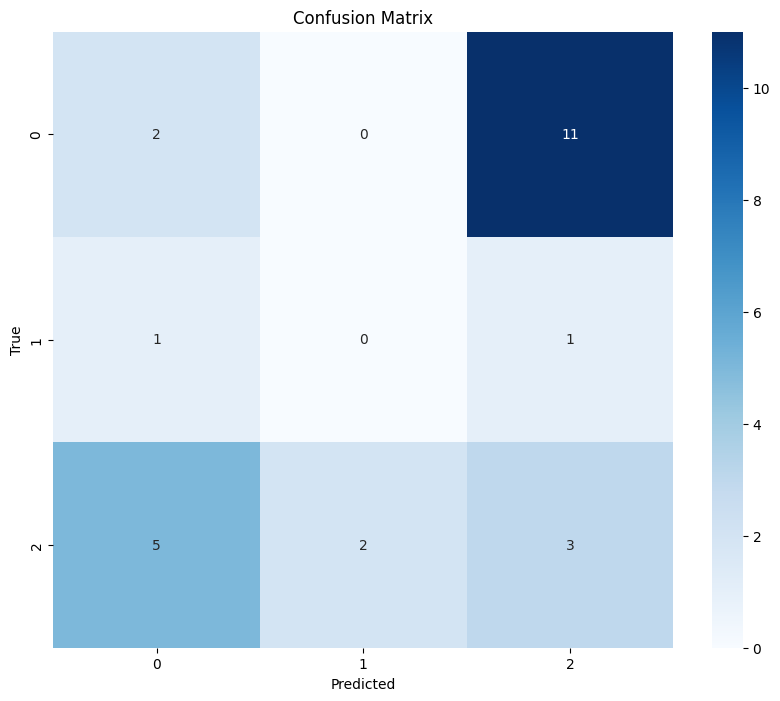

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np


Y_pred = model.predict(valid_generator)
y_pred = np.argmax(Y_pred, axis=1)


y_true = valid_generator.classes

cm = confusion_matrix(y_true, y_pred)


plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:

print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       0.25      0.15      0.19        13
           1       0.00      0.00      0.00         2
           2       0.20      0.30      0.24        10

    accuracy                           0.20        25
   macro avg       0.15      0.15      0.14        25
weighted avg       0.21      0.20      0.20        25



In [ ]:

import numpy as np
from tensorflow.keras.preprocessing import image

In [ ]:
img_path = "/content/drive/MyDrive/strawberry_1.png"
img = image.load_img(img_path, target_size=(180, 180))

In [ ]:
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

In [ ]:
predictions = model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


In [ ]:
predicted_class = np.argmax(predictions[0])

In [ ]:
class_names = list(train_generator.class_indices.keys())
print(f"The machine thinks it's: {class_names[predicted_class]}")

The robot thinks it's: Potato Late blight


In [ ]:
for i, prob in enumerate(predictions[0]):
    print(f"{class_names[i]}: {prob*100:.2f}%")

Potato Early blight: 32.61%
Potato Healthy: 32.10%
Potato Late blight: 35.28%


**MODEL 2**

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, BatchNormalization

model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history2 = model.fit(
    train_generator,
    epochs=10,
    validation_data=valid_generator,
    callbacks=callbacks
)


Epoch 1/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 940s 2s/step - accuracy: 0.9537 - loss: 0.1278 - val_accuracy: 0.6000 - val_loss: 1.2943 - learning_rate: 5.0000e-04
Epoch 2/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 945s 2s/step - accuracy: 0.9728 - loss: 0.1066 - val_accuracy: 0.6400 - val_loss: 1.7620 - learning_rate: 5.0000e-04
Epoch 3/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 905s 1s/step - accuracy: 0.9893 - loss: 0.0353 - val_accuracy: 0.6400 - val_loss: 2.4151 - learning_rate: 5.0000e-04
Epoch 4/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 921s 1s/step - accuracy: 0.9915 - loss: 0.0236 - val_accuracy: 0.7200 - val_loss: 2.0839 - learning_rate: 5.0000e-04
Epoch 5/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 915s 1s/step - accuracy: 0.9935 - loss: 0.0177 - val_accuracy: 0.7200 - val_loss: 1.6506 - learning_rate: 2.5000e-04
Epoch 6/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 934s 2s/step - accuracy: 0.9954 - loss: 0.0103 - val_accuracy: 0.6800 - val_loss: 1.9867 - learning_rate: 2.5000e-04


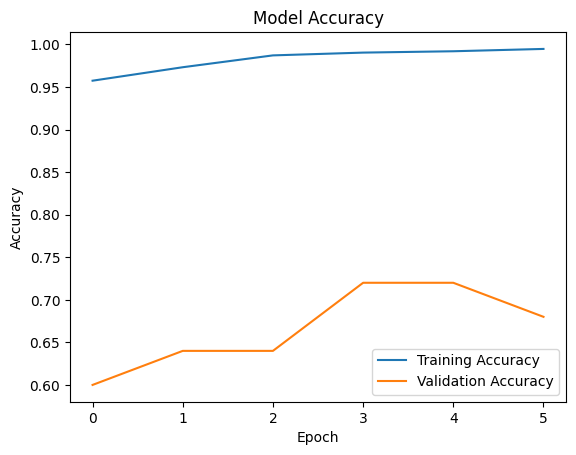

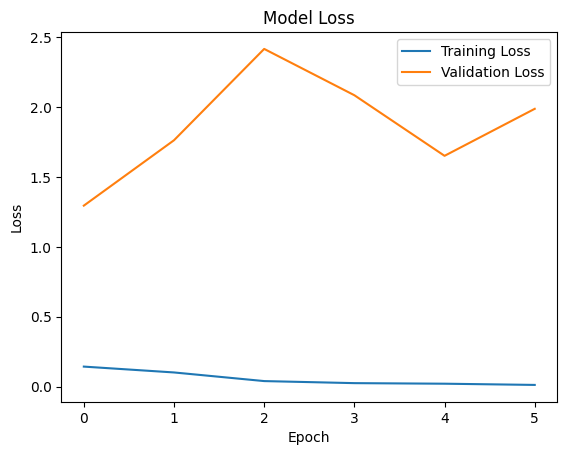

In [ ]:
import matplotlib.pyplot as plt


plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

Y_pred2 = model2.predict(valid_generator)
y_pred2 = np.argmax(Y_pred, axis=1)

y_true2 = valid_generator.classes
cm = confusion_matrix(y_true2, y_pred2)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_true2, y_pred2))

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt


img_path = '/content/drive/MyDrive/strawberry_1.png'
img = image.load_img(img_path, target_size=(180, 180))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)


predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])


class_names = list(train_generator.class_indices.keys())

In [ ]:
print(f"The machine thinks it's: {class_names[predicted_class]}")

In [ ]:
for i, prob in enumerate(predictions[0]):
    print(f"{class_names[i]}: {prob*100:.2f}%")

**MODEL 3**

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt



input_shape = (180, 180, 3)

train_datagen3 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    fill_mode='nearest'
)

valid_datagen3 = ImageDataGenerator(rescale=1./255)

train_generator3 = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical'
)

valid_generator3 = valid_datagen.flow_from_directory(
    valid_path,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical'
)


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.5),

    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(train_generator3.num_classes, activation='softmax')
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history3 = model3.fit(
    train_generator3,
    epochs=10,
    validation_data=valid_generator3
)

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history3.history['accuracy'], label='Train Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 3 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(history3.history['loss'], label='Train Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.title('Model 3 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

y_pred_probs = model3.predict(valid_generator)
y_pred3 = np.argmax(y_pred_probs, axis=1)


true_labels3 = valid_generator.classes
class_names3 = list(valid_generator.class_indices.keys())


cm = confusion_matrix(true_labels3, y_pred3)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names3,
            yticklabels=class_names3)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Model 3')
plt.show()

print("\nClassification Report:\n")
print(classification_report(true_labels3, y_pred, target_names=class_names3))